# Intel Stock Analysis

Brandon Chan 05/01/2023

## Imports

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

In [34]:
data = pd.read_csv("INTC.csv")
data['Date'] = pd.to_datetime(data['Date'])
data['Date_Ordinal'] = data['Date'].apply(lambda x: x.toordinal())
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Date_Ordinal
1255,2024-04-25,34.560001,35.299999,34.500000,35.110001,35.110001,66549400,739001
1256,2024-04-26,31.780001,32.240002,30.639999,31.879999,31.879999,119742500,739002
1257,2024-04-29,31.860001,31.910000,31.070000,31.360001,31.360001,58533300,739005
1258,2024-04-30,31.040001,31.180000,30.420000,30.469999,30.469999,72166600,739006
1259,2024-05-01,30.160000,30.530001,30.020000,30.137501,30.137501,11454808,739007


## 5 Year Trend

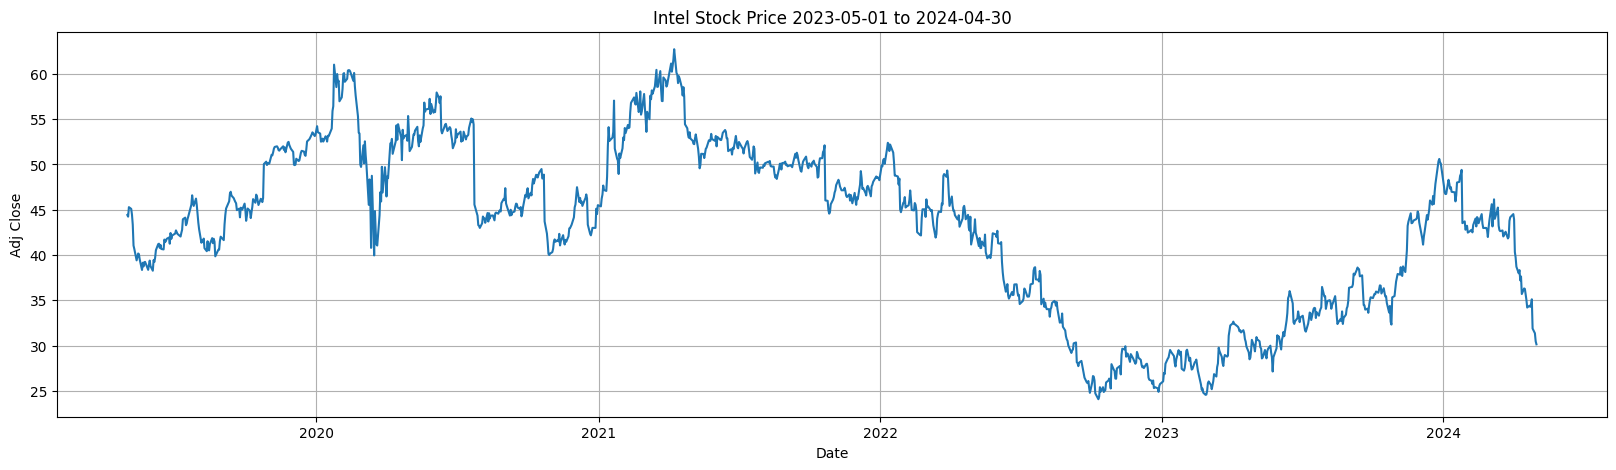

In [35]:
# Time series plot stock price 
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(data, x="Date", y="Adj Close", ax=ax)
ax.set_title("Intel Stock Price 2023-05-01 to 2024-04-30")
ax.grid()

# Higlight 
# plt.axvspan('2024-05-01'.toordinal, '2024-05-01'.toordinal, color='yellow', alpha=0.3)

plt.show()

Stock peaked in early January, currently at it's lowest point in 2024. No significant reason found for the falling price (over blown AI enthusiasm?). People think that Intel will not do well in the upcoming AI boom. Too many resources/not enough competitors (my opinion).     

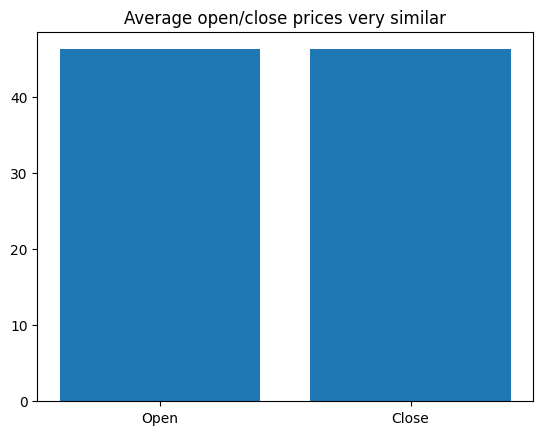

Average difference open-close -0.005299545238095504


In [36]:
# Low vs High price 

# Create lists 
x=["Open", "Close"]
y=[np.mean(data.Open), np.mean(data.Close)] 

# Plotting Open/Close prices 
plt.bar(x=x, height=y)
plt.title("Average open/close prices very similar") 
plt.show()

avg_diff_oc = np.mean(data.Open - data.Close)

print(f"Average difference open-close {avg_diff_oc}")
# So not very significant

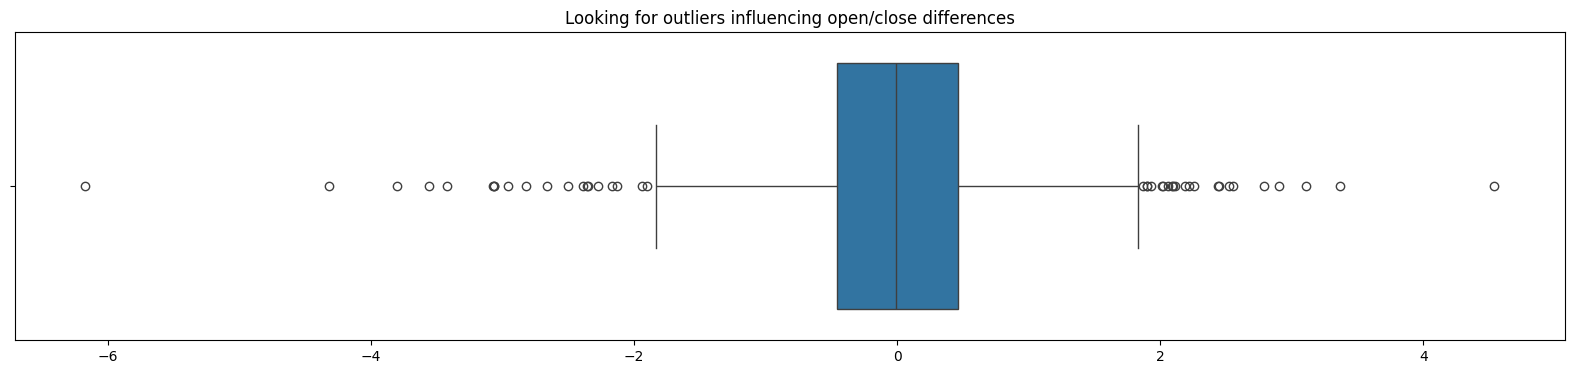

In [46]:
# Looking for outliers in price differences 
o_minus_c = data.Open-data.Close 
fig, ax=plt.subplots(figsize=(20, 4))
sns.boxplot(o_minus_c, orient="h")
plt.title("Looking for outliers influencing open/close differences")
plt.show()
# Occasionaly an outlier, more significant for decreases in the closing price.   

Price tends to fall by an insignificant amount (quite a few outliers - may be unreliable). May be worth it to wait until near close, but not very likely. 

## Close vs Adjclose 
Evaluating siginificance of adjusted close price 

Average difference close-adjusted close price $3.142908892857143

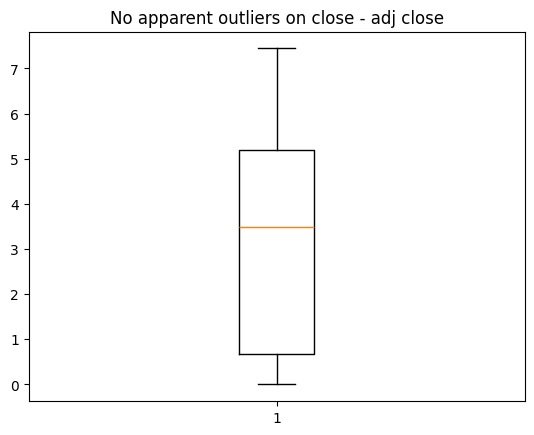

In [38]:
print(f"Average difference close-adjusted close price ${np.mean(data['Close'] - data['Adj Close'])}")

plt.boxplot(data['Close'] - data['Adj Close'])
plt.title("No apparent outliers on close - adj close")
plt.show()

So the adjusted close price seems to be about $3.14 lower on average. May be significant, should use adjusted close price. 

## Volume Time Series    

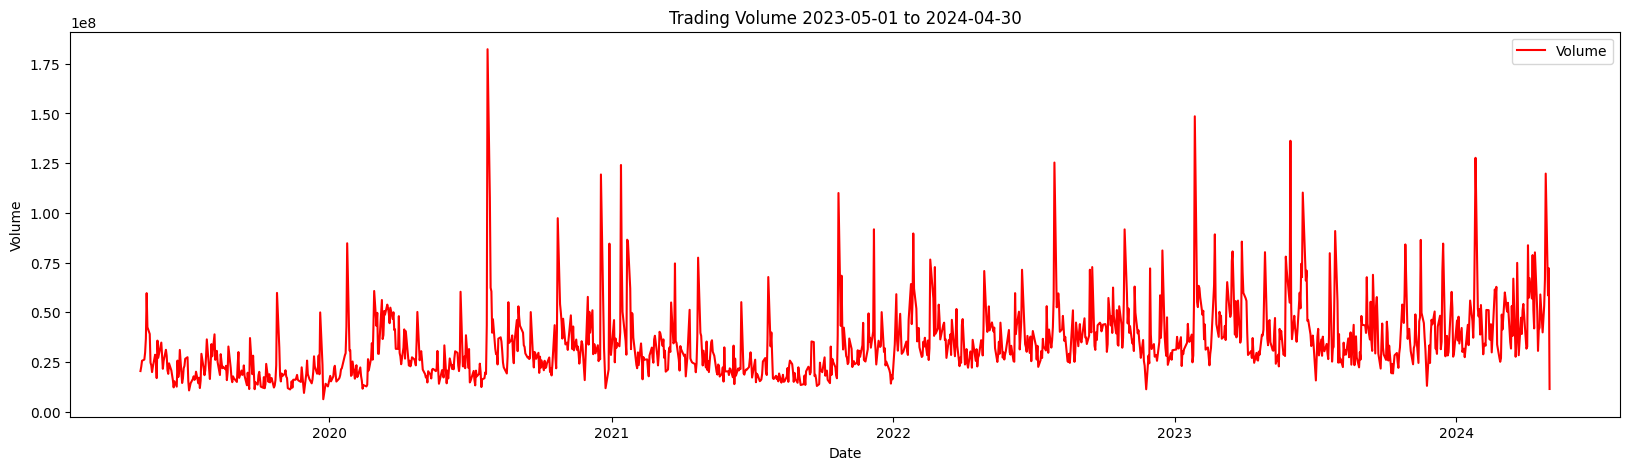

In [39]:

fig, ax=plt.subplots(figsize=(20, 5))
sns.lineplot(data, x="Date", y="Volume", ax=ax, color="red", label="Volume") 
ax.set_title("Trading Volume 2023-05-01 to 2024-04-30")  
plt.show()

## Find Correlation Between Extreme Volume and Price

In [40]:
corr_vol_price = np.corrcoef(data.Volume, data['Adj Close'])[0][1]
extreme_vol = data[data.Volume>100000000]
cvp_extreme = np.corrcoef(extreme_vol.Volume, extreme_vol['Adj Close'])[0][1]
print(f"Correlation between Volume vs Price {corr_vol_price}")
print(f"Correlation between Extreme Volume vs Price {cvp_extreme}")

Correlation between Volume vs Price -0.3322926471852537
Correlation between Extreme Volume vs Price -0.09345660913949973


So on days with higher trade volume, the adjusted close price generally decreases. The correlation is less clear for days with extremely high trading volume. My guess is that days with extreme volumes of trading either drive up or drive down the price fairly significantly, effectively cancelling each other out. 

## Simple Linear Regression Prediction: Use Date to Predict Price 

Linear regression expected price: $34.15404047717129


Text(0.5, 1.0, 'Price Expected to be Higher at Current Date')

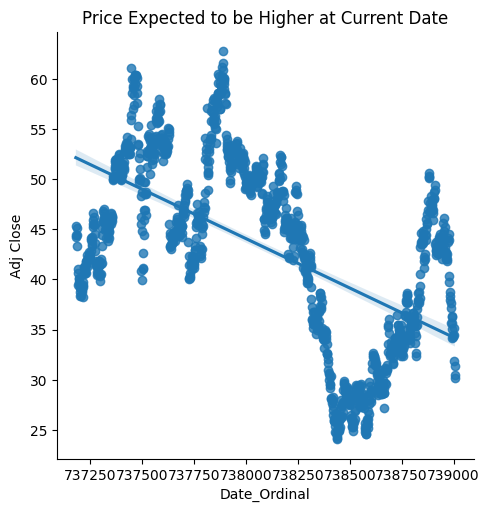

In [41]:
model = LinearRegression()
model.fit(data[['Date_Ordinal']], data['Adj Close'])
expected_price = model.predict([[datetime.now().date().toordinal()]])[0]

print(f"Linear regression expected price: ${expected_price}")


sns.lmplot(data, x='Date_Ordinal', y='Adj Close')
plt.title("Price Expected to be Higher at Current Date")

The linear regression model predicts the stock to be up about $4 from what it is currently. Further confirms my thoughts, although using the date as the predictor seems a little iffy.

## Simple Linear Regression Prediction: Use Volume to Predict Price 

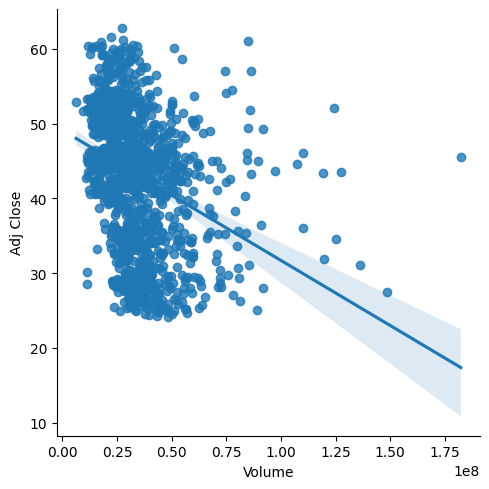

In [42]:
model = LinearRegression()
model.fit(data[['Volume']], data['Adj Close'])
data['Volume Price Prediction'] = model.predict(data[['Volume']])
# print(data.tail(5))
sns.lmplot(data, x='Volume', y='Adj Close')

The price is generally expected to be higher as of late based on trading volume. 

## Predicting Price with Volume and Date (Multiple Linear Regression) 

In [43]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(data[['Date_Ordinal', 'Volume']], data['Adj Close'], test_size = 0.10)

model.fit(X_train, y_train) 
price_prediction = model.predict([[739006, 36.548383]])[0] 

print(f"Adjusted close price prediction using date and volume: ${price_prediction}")

Adjusted close price prediction using date and volume: $37.19690940843884


# Temporary Conclusion 

All signs seem to support my original hypothesis, that Intel stock is a good investment as of May 1st, 2024. The current generation Intel Meteor Lake CPU's are also on par with AMD's for consumer products. Based on the current price predictions of the models and the quality of Intel's products, I think that the stock should be trading at a much price. 